# Assignment on Measures of Central Tendency & Dispersion
#### An Institution wishes to find out their student’s ability in mathematics, reading and writing skills. The Institution wants to do an exploratory study to check the following information.


In [28]:
#import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Find out how many males and females participated in the test.

In [29]:
#import the dataset

students_data = pd.read_csv("StudentsPerformance.csv")

In [30]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [31]:
# find number of rows and columns
students_data.shape

(1000, 8)

In [32]:
# use value_counts to find number of males and females in the data

students_data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

#### 518 female students and 482 male students participated in the test.

### 2. What do you think about the students' parental level of education?

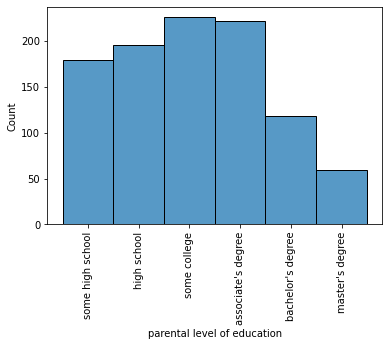

In [33]:
sns.histplot(students_data["parental level of education"] )
plt.xticks(rotation=90)

plt.show()

#### Since the histogram is skewed to the right , we can say lesser number of student's parents completed bachelor's or master's degree. The peak shows that more than 250 of them had some college or associate's degree.

### 3. Who scores the most on average for math, reading and writing based on 
#### a)Gender 
#### b)Test preparation course

In [34]:
# a) create a pivot table grouped by gender filled with mean values of math,reading and writing scores

by_gender = pd.pivot_table(students_data, values=["math score","reading score","writing score"], index=["gender"], aggfunc=np.mean)

In [35]:
print(by_gender)

        math score  reading score  writing score
gender                                          
female   63.376448      72.590734      72.467181
male     68.821577      65.545643      63.446058


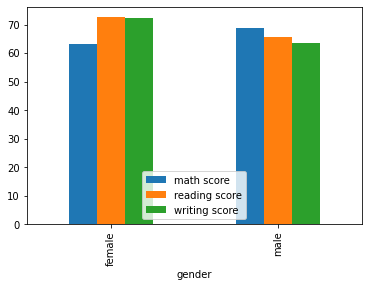

In [36]:
by_gender.plot(kind="bar")
plt.show()

#### Female students scored most in reading(72.59) and writing(72.46), whereas Male students scored the most in math(68.82).

In [37]:
# b) create a pivot table grouped by Test preparation course filled with mean values of math,reading and writing scores
by_testprep = pd.pivot_table(students_data, values=["math score","reading score","writing score"], index=["test preparation course"], aggfunc=np.mean)

In [38]:
print(by_testprep)

                         math score  reading score  writing score
test preparation course                                          
completed                  69.96648      74.175978      74.684358
none                       63.78972      66.417445      64.457944


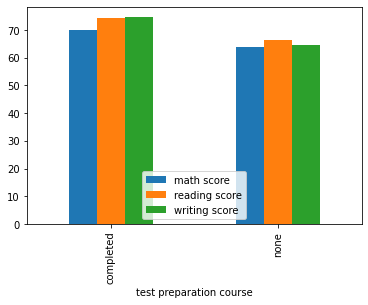

In [39]:
by_testprep.plot(kind="bar")
plt.show()

#### Students that completed test prep course scored the most in math(69.96), reading(74.17) and writing(74.68) compared to students those who didn't take any test prep course.

### 4. What do you think about the scoring variation for math, reading and writing based on
#### a) Gender
#### b) Test preparation course

In [40]:
# a) create a pivot table grouped by gender filled with standard deviation values of math,reading and writing scores

by_gender1 = pd.pivot_table(students_data, values=["math score","reading score","writing score"], index=["gender"], aggfunc=np.std)

In [41]:
print(by_gender1)

        math score  reading score  writing score
gender                                          
female   16.029928      14.411018      14.844842
male     14.556411      14.149594      14.227225


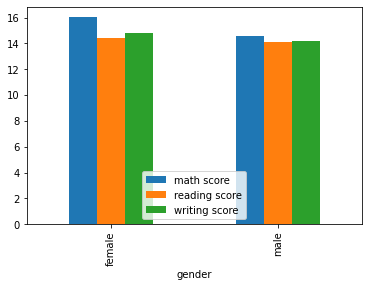

In [42]:
by_gender1.plot(kind="bar")
plt.show()

#### In female students, math score had the highest standard deviation (16.02) and reading score had the lowest standard deviation(14.41). In male students, math score had the highest standard deviation(14.55) and reading score(14.14) had the lowest standard deviation. Overall, math score had highest variation between male and female students, whereas reading score had lowest variation.

In [43]:
# b) create a pivot table grouped by Test preparation course filled with standard deviation values of math,reading and writing scores

by_testprep1 = pd.pivot_table(students_data, values=["math score","reading score","writing score"], index=["test preparation course"], aggfunc=np.std)


In [44]:
print(by_testprep1)

                         math score  reading score  writing score
test preparation course                                          
completed                 14.521847      13.537572      13.236412
none                      15.705689      14.608896      15.041667


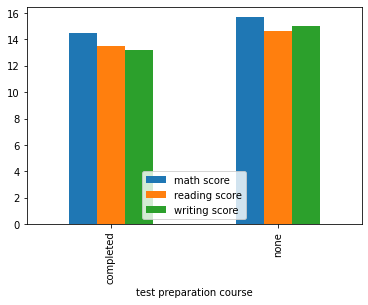

In [45]:
by_testprep1.plot(kind="bar")
plt.show()

#### Standard deviation is high in students who did not complete prep course compared to those who completed it. Among those who completed prep course, variation was highest in math score(14.52) and lowest in writing(13.23). Among those who did not do prep course, variation was highest in math (15.70) and lowest in reading(14.60).

### 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [46]:
#find the 75th percentile value for math score 
q3 = np.percentile(students_data["math score"],75)

In [47]:
q3

77.0

<AxesSubplot:ylabel='math score'>

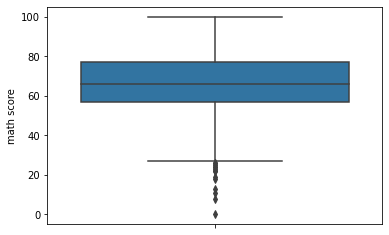

In [48]:
# visualize the range of maths score using boxplot
sns.boxplot(y=students_data["math score"])

In [49]:
# find all the students who scored above 75th percentile to determine the top 25% math scorers.

top_math = students_data[students_data["math score"]>q3]

In [50]:
top_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
430,female,group A,some college,standard,completed,78,87,91
431,female,group B,bachelor's degree,free/reduced,none,78,79,76
432,female,group D,bachelor's degree,standard,none,78,82,79
433,female,group D,high school,standard,none,78,81,80
434,female,group D,bachelor's degree,free/reduced,none,78,90,93
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [51]:
# sort these values in descending order
top_math1 =top_math.sort_values(by=["math score"],ascending=False)

In [52]:
top_math1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
517,female,group E,associate's degree,standard,none,100,100,100
998,male,group E,associate's degree,free/reduced,completed,100,100,93
997,male,group D,some college,standard,completed,100,97,99
996,male,group A,some college,standard,completed,100,96,86
...,...,...,...,...,...,...,...,...
862,male,group D,high school,free/reduced,completed,78,77,80
863,male,group D,some high school,standard,completed,78,81,86
865,male,group E,associate's degree,free/reduced,completed,78,74,72
431,female,group B,bachelor's degree,free/reduced,none,78,79,76


In [53]:
# display only math score column
top_math1[['math score']]

,math score
999,100
517,100
998,100
997,100
996,100
...,...
862,78
863,78
865,78
431,78


<AxesSubplot:xlabel='math score', ylabel='Count'>

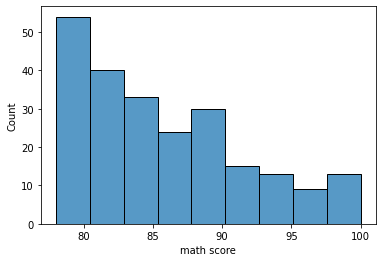

In [54]:
#plot the distrubtion of top math scorers

sns.histplot(top_math1['math score'])

#### There are 231 students who scored above third quartile (77) in math and fall in the top 25%. Hence the management can award bonus points to these 231 students. 